# S04 T01: Visualització gràfica d'un dataset

# Exercici 1
# Crea almenys una visualització per:
- Una variable categòrica (UniqueCarrier)
- Una variable numèrica (ArrDelay)
- Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
- Dues variables numèriques (ArrDelay i DepDelay)
- Tres variables (ArrDelay, DepDelay i UniqueCarrier)
- Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [1]:
# Pandas for managing datasets
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

df=pd.read_csv("DelayedVuelos2.csv")
df.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
Cancelled            0
CancellationCode     0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
TotalDelay           0
velocidad            0
delay_arr            0
delay3h              0
Distance_km          0
dist_group           0
dtype: int64

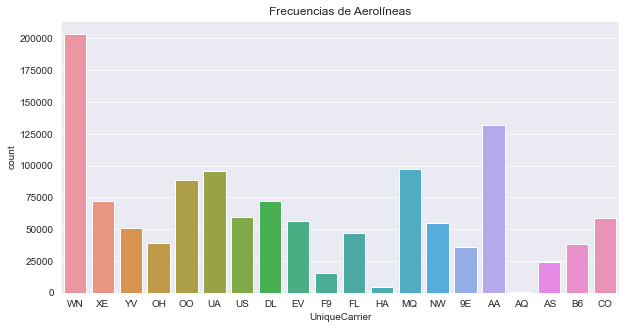

In [3]:
#########################################
#Una variable categòrica (UniqueCarrier)#
#########################################

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(x='UniqueCarrier', data=df)
plt.title("Frecuencias de Aerolíneas");
plt.savefig('Fig01_categorica.png', dpi = 100, transparent =False)

#Graficamos el número de observaciones de aerolineas "UniqueCarrier" de la base de datos.

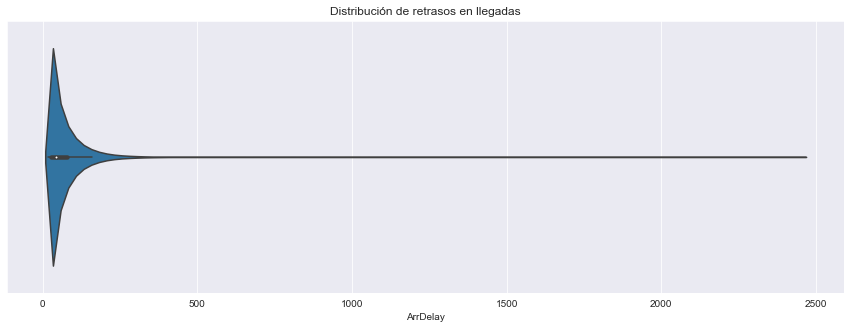

In [4]:
###################################
# Una variable numérica (ArrDelay)#
###################################
f, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(data=df, x='ArrDelay')
plt.title("Distribución de retrasos en llegadas");
plt.savefig('Fig02_numerica.png', dpi = 100, transparent =True)
# El violinplot muestra la distribución de vuelos con retraso en llegadas.
# la mayor parte los vuelos con retraso se ubican en frecuencias en la base, con valores menores a 60 

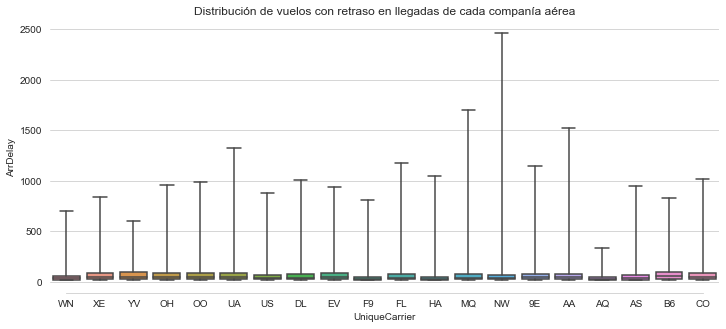

In [5]:
#####################################################################
# Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier) #
#####################################################################

#La misma variable pero diferenciando su distribución según la compañía aérea

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x="UniqueCarrier", y="ArrDelay", data=df,
            whis=[0, 100], width=.8)
ax.xaxis.grid(False)
ax.set(title="Distribución de vuelos con retraso en llegadas de cada companía aérea")
sns.despine(trim=True, left=True)
plt.savefig('Fig03_Categ_numerica.png', dpi = 100, transparent =True)

# los principales estadísticos descriptivos para cada compañía se ubican por debajo de los 60 vuelos.
# Sin embargo, los outliers se mueven en rangos mucho más alejados. 
# NW, MQ, AA presentan retrasos de más de 1500 min.

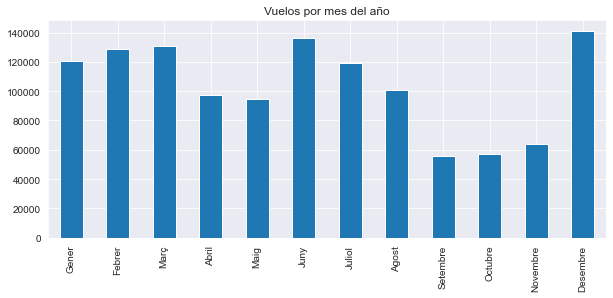

In [6]:
#Visualizar una variable categórica y una numérica
#Siguiendo el ejemplo de Ricardo para hacer la prueba

mes_any = df["Month"].value_counts().sort_index()
mes_any.index=["Gener", "Febrer","Març","Abril","Maig","Juny","Juliol","Agost","Setembre","Octubre","Novembre","Desembre"]
mes_any.index
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10, 4))
mes_any.plot(kind="bar", title="Vuelos por mes del año")
plt.savefig('Fig03_Categ_numerica2.png', dpi = 100, transparent =True)
plt.show()

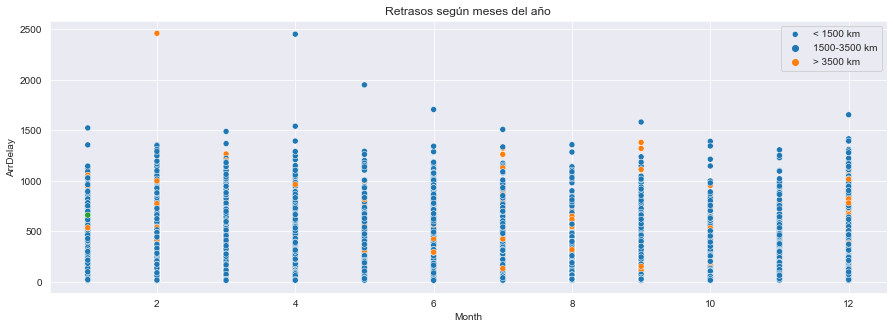

In [7]:
# La misma pero con gráficos de dispersión
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 5))
ax.set(title="Retrasos según meses del año")
sns.scatterplot(x="Month", y="ArrDelay", data=df, hue="dist_group",   
               )
plt.legend(labels=["< 1500 km ","1500-3500 km","> 3500 km"]);
plt.savefig('Fig03_categ_numerica3.png', dpi = 100, transparent =True)

# EL gráfico indica, por colores, que los retrasos son fundamentalmente en vuelos cortos A = menores de 1500km de recorrido,
# Los vuelos de recorrido medio B=entre 1500 y 3500 km están mucho menos presentes
# Prácticmante no encontramos retrasos en vuelos de largo recorrido C=más de 3500km.

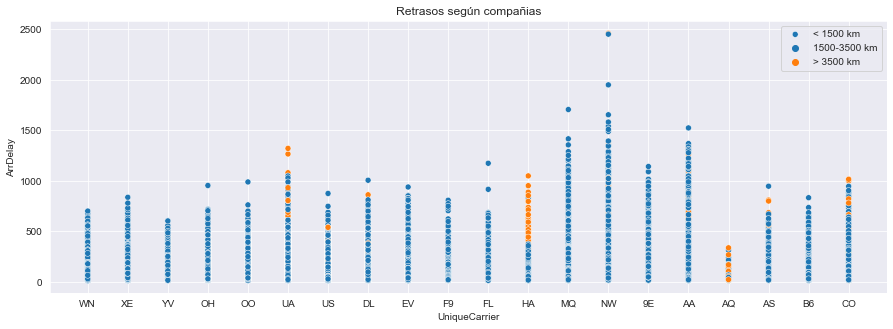

In [8]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 5))
ax.set(title="Retrasos según compañias")
sns.scatterplot(x="UniqueCarrier", y="ArrDelay", data=df, hue="dist_group",   
               )
plt.legend(labels=["< 1500 km ","1500-3500 km","> 3500 km"]);
plt.savefig('Fig03_categ_numerica4.png', dpi = 100, transparent =True)

# la mayor parte de las aerolíneas tienen retrasos de menos de 1500 km.
# El gráfico muestra claramente aquellas compañías con retrasos en trayectos largos, de más de 3500km: AQ, HA, UA, CO.

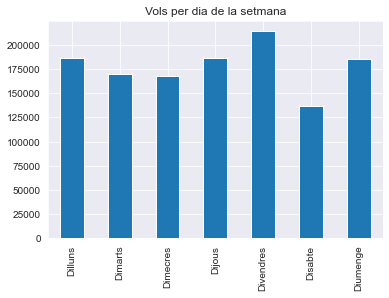

In [11]:
#Ejemplo de Ricardo para hacer la prueba
vols_dia_setmana = df['DayOfWeek'].value_counts().sort_index()
vols_dia_setmana.index = ['Dilluns', 'Dimarts', 'Dimecres', 'Dijous', 'Divendres', 'Disabte', 'Diumenge']
vols_dia_setmana.index
vols_dia_setmana.plot(kind='bar', title='Vols per dia de la setmana')
plt.show()

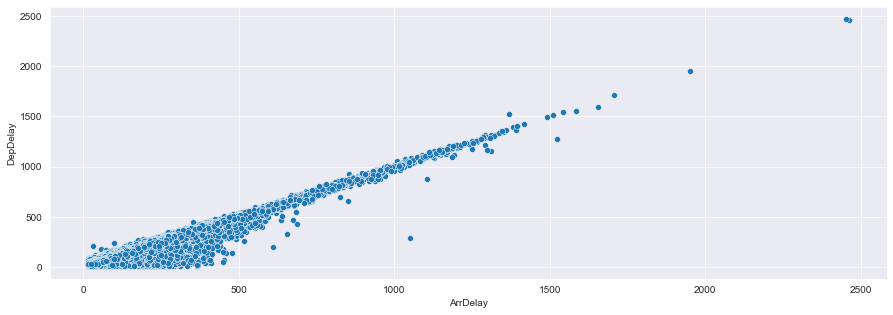

In [9]:
#################################################
# Dues variables numèriques (ArrDelay i DepDelay)#
#################################################
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=df, x="ArrDelay", y="DepDelay");
plt.savefig('Fig04_dos_numericas.png', dpi = 100, transparent =True)

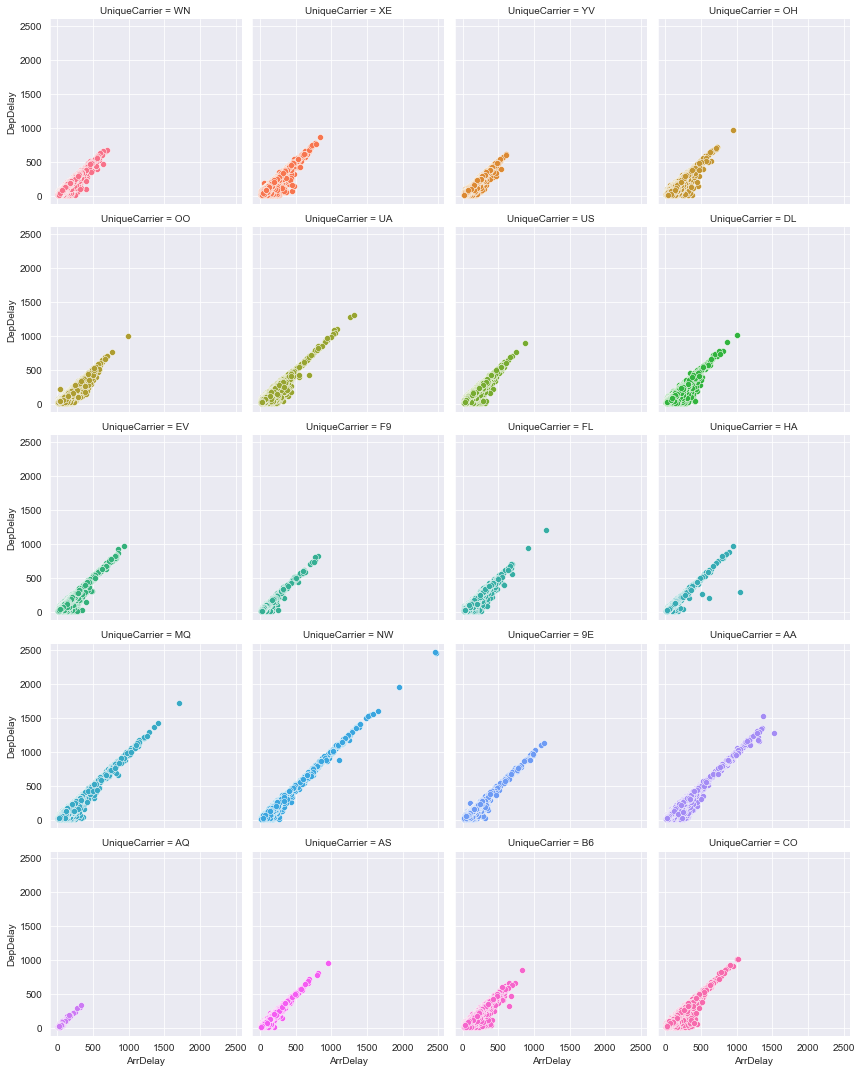

In [14]:
######################################################
# Tres variables (ArrDelay, DepDelay i UniqueCarrier)#
######################################################

ax = sns.FacetGrid(df, col="UniqueCarrier", hue="UniqueCarrier", col_wrap=4)
ax.map(sns.scatterplot,"ArrDelay","DepDelay")
plt.savefig('Fig05_tres_variables.png', dpi = 100, transparent =True)

# los gráficos muestran la distribución de retrasos de salidas y llegadas para cada aerolínea
# Las que menos retrasos presentan son AQ, YV y F9.

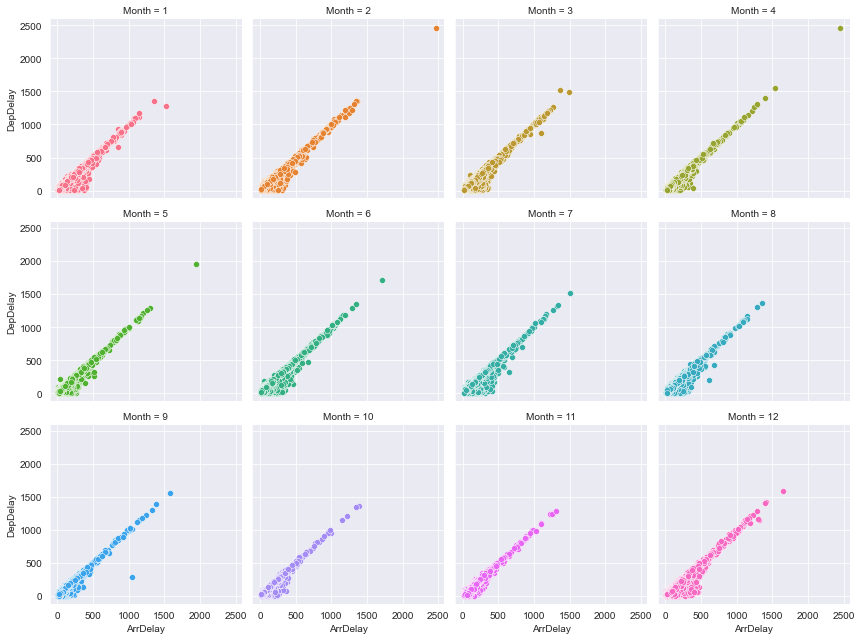

In [10]:

ax = sns.FacetGrid(df, col="Month", hue="Month", col_wrap=4)
ax.map(sns.scatterplot,"ArrDelay","DepDelay")
plt.savefig('Fig05_tres_variables2.png', dpi = 100, transparent =True)
# la distribución de retrasos en salidas y llegadas según los meses del año 

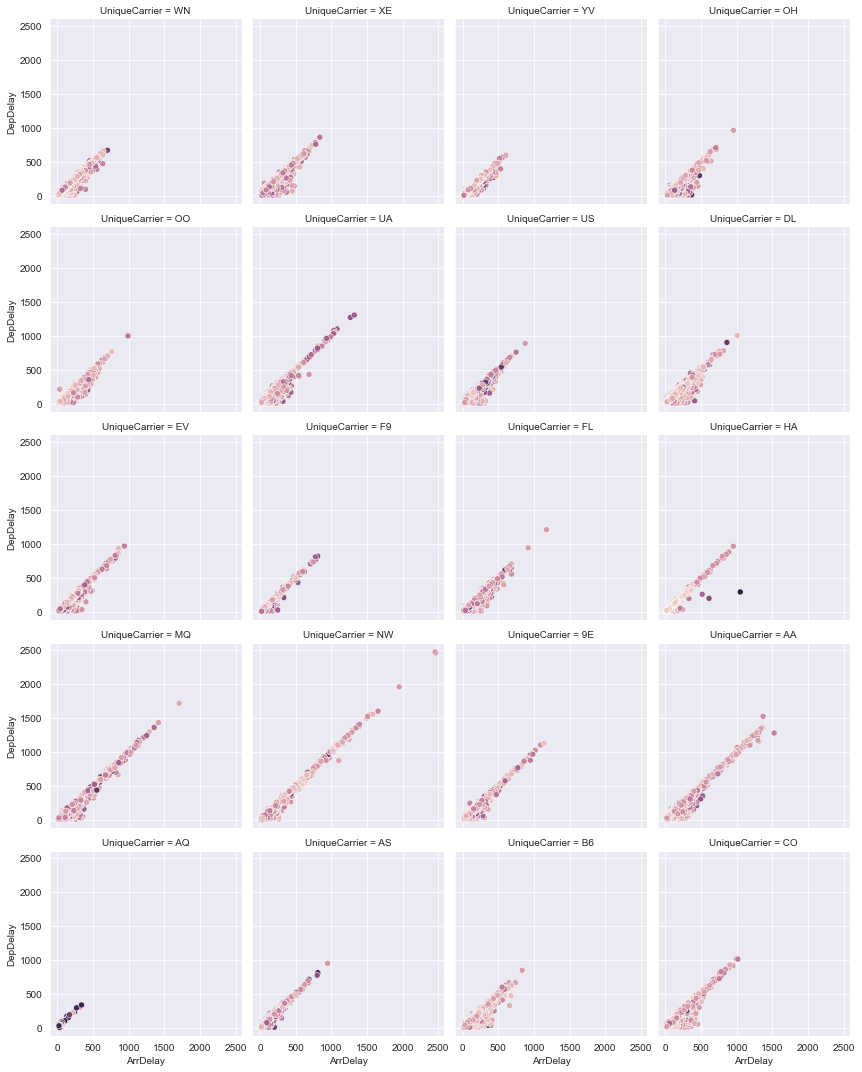

In [11]:
#####################################################################
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)#
#####################################################################

ax = sns.FacetGrid(df, col="UniqueCarrier", col_wrap=4 )
                   
ax.map(sns.scatterplot,"ArrDelay","DepDelay","AirTime");

plt.savefig('Fig6_Cuatro_variables.png', dpi = 100, transparent =True)


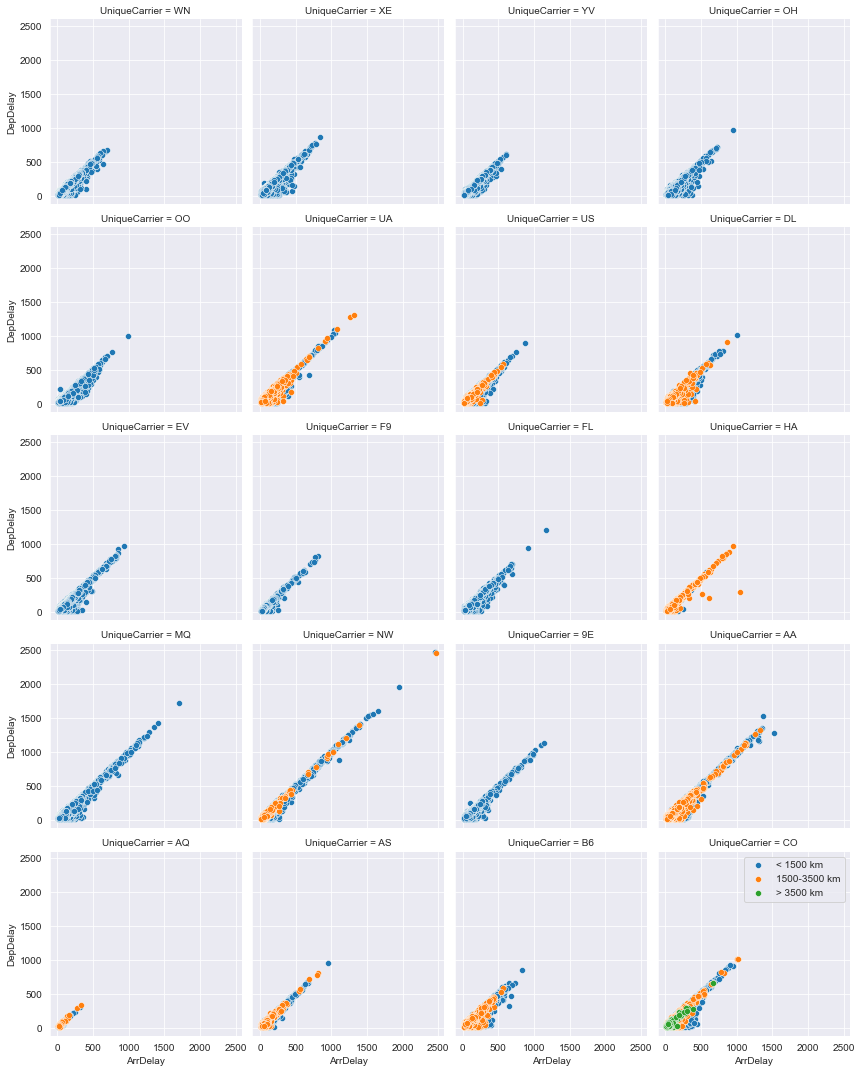

In [12]:
#####################################################################
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)#
#####################################################################

ax = sns.FacetGrid(df, col="UniqueCarrier", hue="dist_group", col_wrap=4 )
                   
ax.map(sns.scatterplot,"ArrDelay","DepDelay");
plt.legend(labels=["< 1500 km ","1500-3500 km","> 3500 km"]);
plt.savefig('Fig6_Cuatro_variables2.png', dpi = 100, transparent =True)
#AirTime está transformado en tres grupos según sean los vuelos más cortos o más largos
# Distribución de retrasos según aerolínea
# 10 aerolíneas acumulan retrasos en trayectos cortos, menos de 1500 kms.
# Otras 9 aerolíneas acumulan retrasos fundamentalmente en trayectos medios (1500-3500 km.)
# Solo la compañia CO presenta retrasos en todos los tipos de trayectos.

## Exercici 2. 
### Exporta els gràfics com imatges o com html.

In [ ]:
# Se han guardado después de cada gráfico en formato imagen .png

## Exercici 3
### Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.


In [ ]:
# OK integradas.